# EDA day_1
Aurtor : Ayesha\
Date: 12/9/2024

In [34]:
# Data import 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats


In [101]:
#data import 
df=sns.load_dataset('titanic')

In [36]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
# bigger picture
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [38]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [39]:
df['survived'].unique()

array([0, 1], dtype=int64)

In [40]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [41]:
df['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [42]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='age', ylabel='Count'>

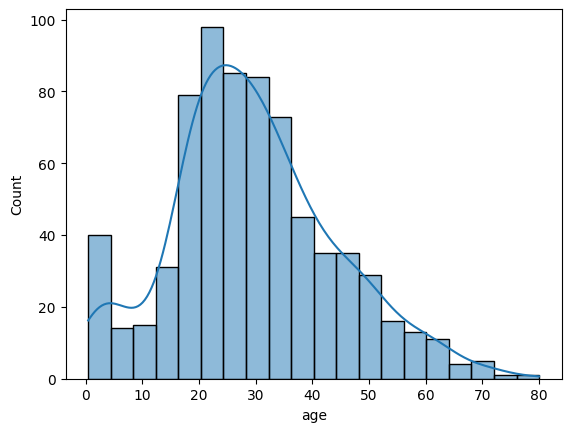

In [43]:
sns.histplot(df,x=df['age'], kde=1)

In [44]:
stats.shapiro(df['age'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [45]:
stats.shapiro(df['fare'])

ShapiroResult(statistic=0.5218914747238159, pvalue=1.0789998175301091e-43)

<AxesSubplot:xlabel='fare', ylabel='Count'>

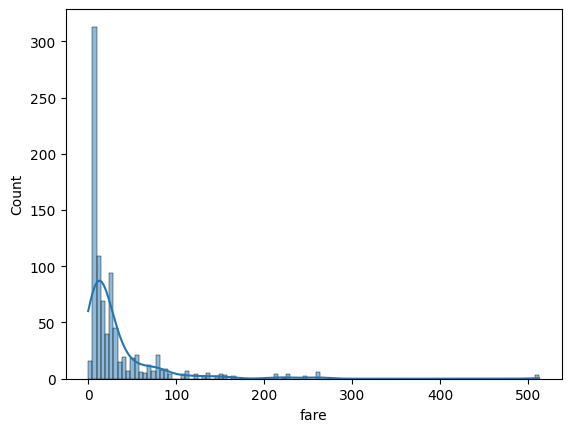

In [46]:
sns.histplot(df, x=df['fare'],kde=1)

<AxesSubplot:xlabel='class', ylabel='fare'>

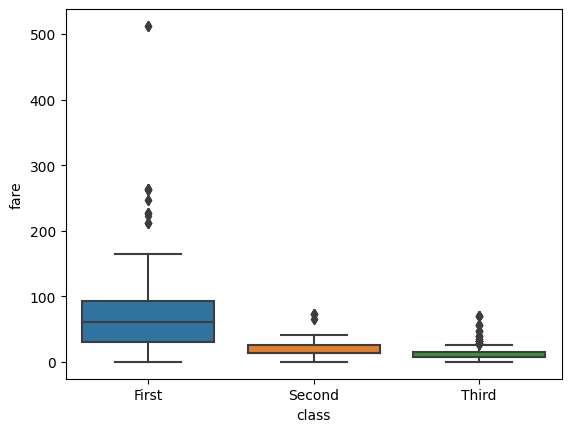

In [47]:
sns.boxplot(data=df, x='class', y='fare')

In [48]:
df_first=df[df['class']=='First']

In [49]:
stats.shapiro(df_first['fare'])

ShapiroResult(statistic=0.718401312828064, pvalue=7.556354866266318e-19)

In [50]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [94]:
# Filter data for passengers in the 'First' class
df_first = df[df['class'] == 'Third']

# IQR method for 'fare' column
Q1 = df_first['fare'].quantile(0.25)
Q3 = df_first['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_outliers = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]
df_outliers.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


<AxesSubplot:xlabel='fare', ylabel='Count'>

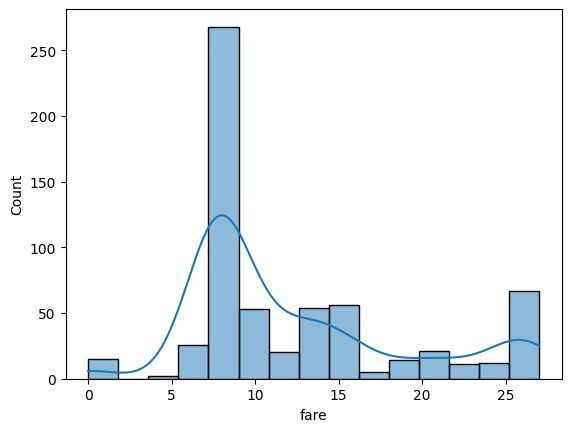

In [102]:
sns.histplot(df_outliers['fare'], kde=1)

In [90]:
stats.shapiro(df_outliers['fare'])

ShapiroResult(statistic=0.7018013596534729, pvalue=1.2713434348314101e-36)

c:\Users\HP\.conda\envs\My_env\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log



<AxesSubplot:xlabel='fare', ylabel='Count'>

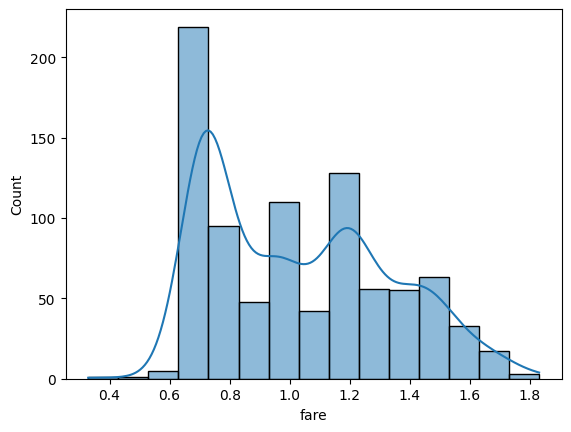

In [104]:
#subset
df['fare'] = np.log(df['fare'])
df.head()
stats.shapiro(df['fare'])
sns.histplot(x=df['fare'],kde=1)
#method

#code

#make plot

#normal dist test


In [105]:
stats.shapiro(df['fare'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [106]:
df_log

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: fare, Length: 891, dtype: float64